# Convolutional Neural Networks

Convolutional neural networks are generally used when we are dealing with image data.

Their main advantage over densely connected neural networks is **efficiency**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test set

%matplotlib inline

/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

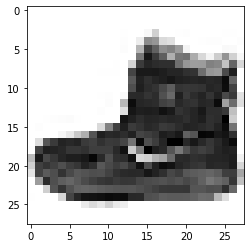

In [3]:
from matplotlib.image import imread

img = imread('images/shoe.png')

from PIL import Image
img = Image.open('images/shoe.png').convert('LA')

plt.imshow(np.array(img)[:, :, 0], cmap='Greys')
# dir(img)

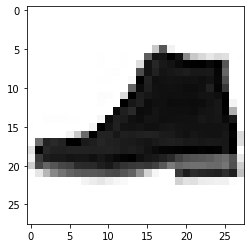

In [4]:
plt.imshow(X_train[42], cmap='Greys')

In [5]:
labels = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

labels[y_train[42]]

'Ankle boot'

In [6]:
y_train = [labels[y] for y in y_train]
y_test = [labels[y] for y in y_test]

In [7]:
y_train[10:20]

['T-shirt/top',
 'Ankle boot',
 'Sandal',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'Trouser',
 'T-shirt/top',
 'Shirt',
 'Coat']

In [8]:
X_train[0].shape

(28, 28)

##### We want to scale our data to be betwen 0 and 1.

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
X_train.shape

(60000, 784)

##### We want to reshape each image to be 28 x 28 x 1.
** not always

In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Now let's check out `y_train`.

In [14]:
y_train[0:10]

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

In [15]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [16]:
lb.inverse_transform(y_train[[0]])

array(['Ankle boot'], dtype='<U11')

In [17]:
X_train[0].shape

(28, 28, 1)

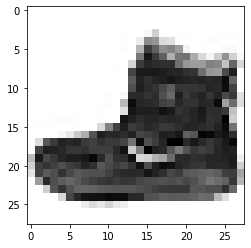

In [18]:
plt.imshow(X_train[0][:, :, 0], cmap='Greys')

In [19]:
lb.inverse_transform(y_train[[0]])

array(['Ankle boot'], dtype='<U11')

### Feedforward neural network

In [20]:
model = Sequential()

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(128, input_shape=(28, 28), activation='relu'))

In [23]:
model.add(Dense(32, activation='relu'))

In [24]:
model.add(Dense(10, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    verbose=1)

W0120 12:54:44.469546 4465155392 deprecation.py:323] From /Users/max/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.6354 - accuracy: 0.7865 - val_loss: 0.4820 - val_accuracy: 0.8327
Epoch 2/5
60000/60000 [==============================] - 1s 14us/sample - loss: 0.4219 - accuracy: 0.8521 - val_loss: 0.4410 - val_accuracy: 0.8457
Epoch 3/5
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3801 - accuracy: 0.8657 - val_loss: 0.4034 - val_accuracy: 0.8570
Epoch 4/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3531 - accuracy: 0.8737 - val_loss: 0.4135 - val_accuracy: 0.8514
Epoch 5/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3352 - accuracy: 0.8791 - val_loss: 0.3636 - val_accuracy: 0.8721


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  4128      
_________________________________________________________________
dense_2 (Dense)              multiple                  330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


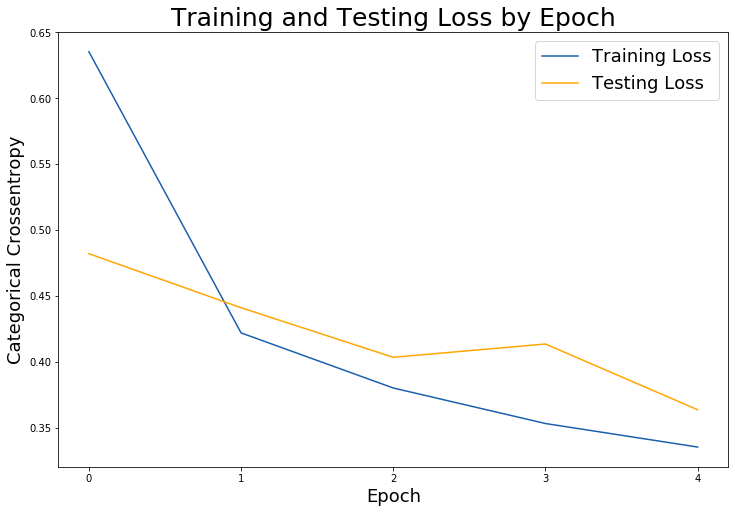

In [28]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))

plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4])

plt.legend(fontsize = 18);

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  4128      
_________________________________________________________________
dense_2 (Dense)              multiple                  330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [30]:
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

10000/10000 [==============================] - 1s 50us/sample - loss: 0.3636 - accuracy: 0.8721


In [31]:
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

loss: 0.3635558172225952
accuracy: 0.8720999956130981


In [32]:
X_test[0].shape

(28, 28, 1)

In [33]:
X_test.shape

(10000, 28, 28, 1)

In [34]:
X_test[0:10].shape

(10, 28, 28, 1)

In [35]:
np.set_printoptions(suppress=True)

In [36]:
lb.inverse_transform(y_test[0:1])

array(['Ankle boot'], dtype='<U11')

In [37]:
np.argmax(model.predict(X_test[0:1]))

0

Input layer, we have $28 * 28 = 784 neurons.
First hidden layer, we have 64 neurons.
Second hidden layer, we have 32 neurons.
Output layer, we have 10 neurons.

128 + 32 + 10 = 170 bias parameters.
784 * 128 = 100,352 weight parameters.
128 * 32 = 4,096 weight parameters.
32 * 10 = 320 weight parameters.

Therefore, 170 + 100,352 + 4,096 + 320 approx 105,000 parameters.

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  4128      
_________________________________________________________________
dense_2 (Dense)              multiple                  330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


## Convolutional Neural Networks

A CNN will generally consist of three types of layers:
- Convolutional Layer
- Pooling Layer
- Densely Connected Layer

In [39]:
X_train.shape

(60000, 28, 28, 1)

In [40]:
cnn_model = Sequential()

In [41]:
cnn_model.add(Input(shape=(28, 28, 1)))
# cnn_model.add(Input(shape=X_train[0].shape))


cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu'))

We have to specify the input shape in our first cell, just like we had to do earlier!

In [42]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

In [43]:
cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))

In [44]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [45]:
cnn_model.add(Flatten())

In [46]:
cnn_model.add(Dense(128, activation='relu'))

In [47]:
cnn_model.add(Dense(len(lb.classes_), activation='softmax'))

In [48]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [49]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [50]:
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=5,
                        verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.7971 - accuracy: 0.7224 - val_loss: 0.5559 - val_accuracy: 0.7975
Epoch 2/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4872 - accuracy: 0.8207 - val_loss: 0.4682 - val_accuracy: 0.8332
Epoch 3/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4327 - accuracy: 0.8443 - val_loss: 0.4336 - val_accuracy: 0.8461
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3997 - accuracy: 0.8568 - val_loss: 0.4175 - val_accuracy: 0.8468
Epoch 5/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3770 - accuracy: 0.8636 - val_loss: 0.3977 - val_accuracy: 0.8573


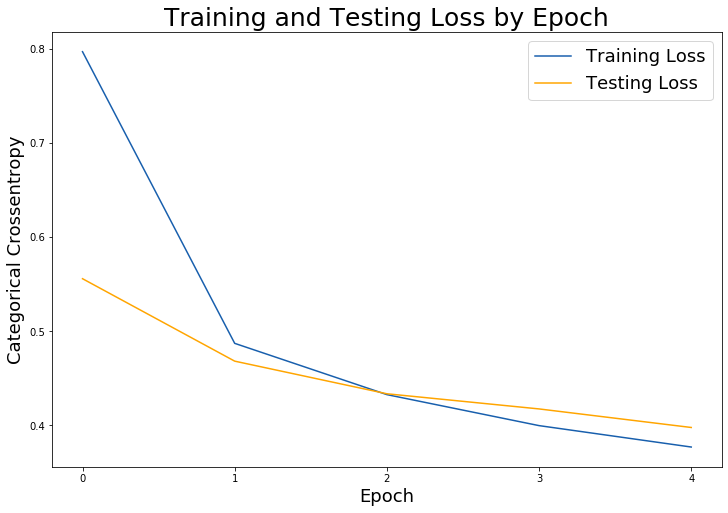

In [51]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))

plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4])

plt.legend(fontsize = 18);

In [52]:
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=1)

cnn_labels = cnn_model.metrics_names

10000/10000 [==============================] - 1s 101us/sample - loss: 0.3977 - accuracy: 0.8573


In [53]:
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

CNN loss  : 0.397738538146019
CNN accuracy   : 0.8572999835014343

FFNN loss : 0.3635558172225952
FFNN accuracy  : 0.8720999956130981


In [54]:
np.set_printoptions(suppress=True)

cnn_model.predict(np.array([X_test[0]]))

array([[0.7623608 , 0.00478902, 0.00002072, 0.00001114, 0.0000753 ,
        0.04599227, 0.0000354 , 0.1867045 , 0.00000958, 0.00000119]],
      dtype=float32)

In [55]:
np.argmax(cnn_model.predict(X_test[0:1]))

0

In [56]:
lb.classes_[0]

'Ankle boot'

In [57]:
lb.classes_

array(['Ankle boot', 'Bag', 'Coat', 'Dress', 'Pullover', 'Sandal',
       'Shirt', 'Sneaker', 'T-shirt/top', 'Trouser'], dtype='<U11')

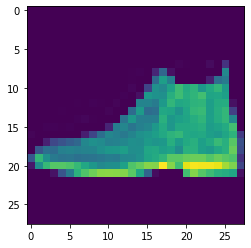

In [58]:
plt.imshow(X_test[0].reshape(28, 28))

### Pooling Layer

Remember that CNNs learn far fewer parameters than a regular feed-forward neural network. Most of the "parameter reduction" comes from the pooling layer.

In [59]:
new = np.array([[[20, 10, 30], [3, 3, 3]], [[20, 10, 30], [3, 3, 3]]])

In [60]:
new

array([[[20, 10, 30],
        [ 3,  3,  3]],

       [[20, 10, 30],
        [ 3,  3,  3]]])

In [61]:
new.flatten()

array([20, 10, 30,  3,  3,  3, 20, 10, 30,  3,  3,  3])

### Densely-Connected Layer

** add flatten

In [62]:
cnn_model_2 = Sequential()

cnn_model_2.add(Conv2D(filters = 16,         # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(28,28,1))) # shape of input (image)

cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

cnn_model_2.add(Conv2D(64,
                       kernel_size = 3,
                       activation='relu'))

cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

cnn_model_2.add(Flatten())

cnn_model_2.add(Dense(64, activation='relu'))

cnn_model_2.add(Dropout(0.5))

cnn_model_2.add(Dense(32, activation='relu'))

cnn_model_2.add(Dropout(0.5))

cnn_model_2.add(Dense(10, activation='softmax'))

cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

history = cnn_model_2.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=5,
                          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 313us/sample - loss: 1.1873 - accuracy: 0.5652 - val_loss: 0.5701 - val_accuracy: 0.7788
Epoch 2/5
60000/60000 [==============================] - 19s 324us/sample - loss: 0.7485 - accuracy: 0.7279 - val_loss: 0.4998 - val_accuracy: 0.8109
Epoch 3/5
60000/60000 [==============================] - 21s 349us/sample - loss: 0.6495 - accuracy: 0.7665 - val_loss: 0.4448 - val_accuracy: 0.8413
Epoch 4/5
60000/60000 [==============================] - 21s 344us/sample - loss: 0.5917 - accuracy: 0.7892 - val_loss: 0.4141 - val_accuracy: 0.8570
Epoch 5/5
60000/60000 [==============================] - 13s 208us/sample - loss: 0.5547 - accuracy: 0.8069 - val_loss: 0.4154 - val_accuracy: 0.8478


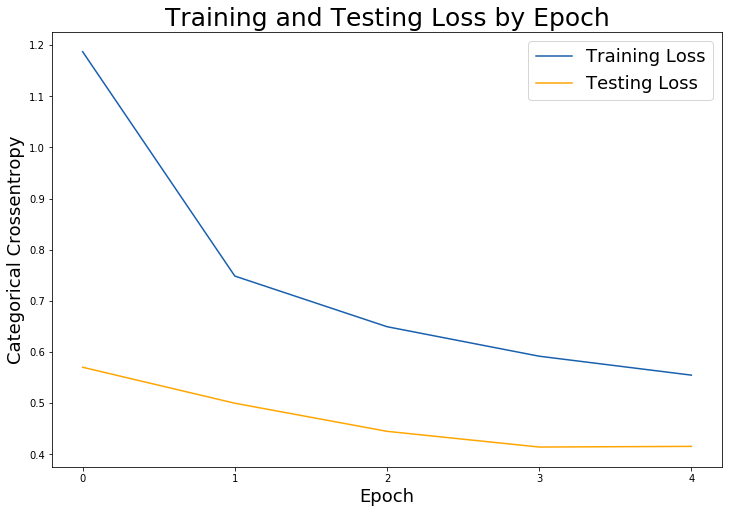

In [63]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))

plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4])

plt.legend(fontsize = 18);

In [64]:
cnn_2_score = cnn_model_2.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_2_labels = cnn_model_2.metrics_names

print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

cnn_model_2.summary()

10000/10000 [==============================] - 1s 57us/sample - loss: 0.4154 - accuracy: 0.8478
CNN 2 loss  : 0.4153792893886566
CNN 2 accuracy   : 0.8478000164031982

CNN 1 loss  : 0.397738538146019
CNN 1 accuracy   : 0.8572999835014343

FFNN loss : 0.3635558172225952
FFNN accuracy  : 0.8720999956130981
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (F

## For supplemental reading material on this topic, check out the following resources:*

- [Keras Documentation: Convolutional Layers](https://keras.io/layers/convolutional)
- [Keras Documentation: Pooling Layers](https://keras.io/layers/pooling/)
- [Convolution Visualizer](https://ezyang.github.io/convolution-visualizer/)
- [Medium Article on CNNs](https://towardsdatascience.com/convolutional-neural-network-17fb77e76c05)
- [Medium Article on CNNs with lots of visuals](https://towardsdatascience.com/understanding-convolutional-neural-networks-through-visualizations-in-pytorch-b5444de08b91)